# Logistic Regression

In [6]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

tf.__version__

'2.10.0'

## Make a dataset for Logistic Regression

### Logistic Regression을 위한 Dataset을 임의로 만들어 봅시다.

* 2가지 위치에 몰려있는 데이터
* 테스트를 위한 빨간색 데이터

## tf.data.Dataset
* 데이터를 관리해주기위한 tf function
* 각 데이터의 필요 기능들을 지원해준다.
* 데이터셋 크기가 클 경우에 메모리에 나눠올리는 기능을 지원

In [7]:
# dataset = tf.data.Dataset.from_tensor_slices(
#     (x_train, y_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [8]:
data = pd.read_csv('logistic_regression_dataset_16_features.csv', )
data.head(10)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,target
0,1.593274,0.613349,0.309724,2.042536,-0.514878,0.997845,1.417079,-0.202117,0.072554,0.945508,-0.650232,-0.706413,2.469982,-1.962653,-0.626638,0.006014,1
1,0.568722,1.843700,-0.737456,-0.919461,0.417854,0.260081,0.443729,-0.833231,-0.072568,0.422924,-1.382024,-0.302917,0.587017,-0.834032,-2.269351,0.752771,0
2,-0.114487,0.271091,-1.536920,0.114670,-2.048833,0.925066,-0.076973,1.733600,0.608673,-1.175680,1.354920,1.463529,-0.397353,1.993837,0.318233,0.232441,1
3,0.251630,1.136448,-0.562255,-0.137424,-0.989744,1.476076,-1.091534,0.190649,0.650469,-0.204851,0.208252,1.800252,0.433550,-0.666660,-1.061392,0.591500,1
4,-1.210856,-1.738332,-1.599511,1.365527,-0.338294,-1.879252,-0.437457,-0.177810,-0.038883,0.956495,1.015896,0.465122,0.500297,0.976290,0.644269,-1.021144,0
5,-0.393734,0.707135,0.824390,-0.261638,1.503827,-0.782529,1.674010,-1.085025,0.645358,1.586134,-0.360298,-0.371584,1.236835,-0.803021,-0.500096,0.146819,1
6,0.085253,0.030386,2.491486,-1.286241,-0.258209,-1.402205,-2.924153,0.972262,1.519226,0.791284,1.031475,-0.297113,-1.019225,1.003510,-2.045259,0.994773,1
7,0.099422,0.765002,1.011855,-1.654657,-0.154596,-1.455286,1.682530,1.431472,-1.347119,-0.550834,0.770652,0.357193,-0.472224,0.438418,1.431038,-0.115347,1
8,-1.530616,0.867665,-0.281238,0.037233,-1.655827,-1.152335,-0.147113,-0.245073,0.311860,-0.671678,-1.467719,-2.678413,0.142993,1.193230,1.810005,-2.203884,0
9,0.327623,-2.256250,0.016707,1.270301,-0.093555,0.096549,-0.367859,-0.623254,-0.695882,-0.696827,0.494101,0.364937,-0.664375,-0.267144,-0.670133,-0.366456,0


In [9]:
x_train = data.iloc[:-100, :-1]
y_train = data.iloc[:-100, [-1]]
x_test = data.iloc[-100:, :-1]
y_test = data.iloc[-100:, [-1]]
x_train = tf.cast(x_train, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.float32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.float32)

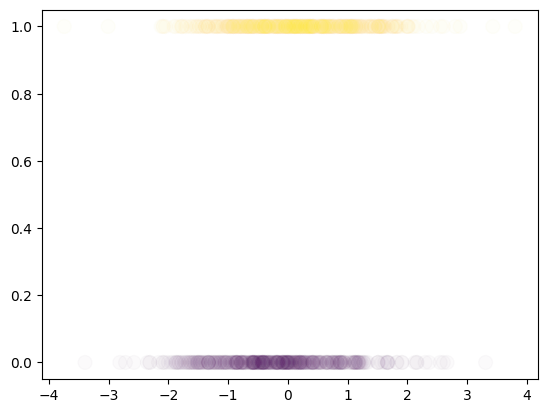

In [10]:
plt.scatter(x_train[:,0], y_train[:], c=y_train, s=100, cmap='viridis',alpha=0.02)

In [11]:
# import numpy as np
# 
# def normalize_features(features):
#     """
#     각 특성을 정규화하는 함수.
# 
#     Parameters:
#     - features: 2D NumPy 배열. 각 열은 하나의 특성을 나타냅니다.
# 
#     Returns:
#     - normalized_features: 정규화된 특성을 담은 2D NumPy 배열.
#     - mean_values: 각 특성의 평균을 담은 1D NumPy 배열.
#     - std_dev_values: 각 특성의 표준 편차를 담은 1D NumPy 배열.
#     """
#     mean_values = np.mean(features, axis=0)
#     std_dev_values = np.std(features, axis=0)
# 
#     # 0으로 나누기를 피하기 위해 표준 편차가 0이면 1로 대체
#     std_dev_values[std_dev_values == 0] = 1.0
# 
#     normalized_features = (features - mean_values) / std_dev_values
# 
#     return normalized_features, mean_values, std_dev_values


In [12]:
# x_train, mean_values, std_dev_values = normalize_features(x_train)

In [13]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(len(x_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [14]:


W = tf.Variable(tf.random.normal([16,1],0,1), name='weight')
b = tf.Variable(tf.random.normal([1],0,1), name='bias')
print(type(W[0,0]))

tf.print(W, b)

<class 'tensorflow.python.framework.ops.EagerTensor'>
[[0.648968399]
 [0.341461837]
 [0.0492026135]
 ...
 [-1.17743754]
 [0.269420981]
 [-0.977989435]] [-1.35441589]


## Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

## $$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [15]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(-(tf.matmul(features, W,) + b)))
    # tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

tf.print(logistic_regression(x_train))

[[0.106212676]
 [0.230191424]
 [0.00464084605]
 ...
 [0.908901095]
 [0.00813616]
 [0.64113754]]


## 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if :  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if :  &  y=0
\end{align}
$$

### 두 식을 한번에 쓰게되면,

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [16]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + \
                           (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.01)

In [17]:
epochs = 10000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(logistic_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),labels)))

Iter: 0, Loss: 1.9254
Iter: 100, Loss: 1.5991
Iter: 200, Loss: 1.3135
Iter: 300, Loss: 1.0727
Iter: 400, Loss: 0.8775
Iter: 500, Loss: 0.7251
Iter: 600, Loss: 0.6092
Iter: 700, Loss: 0.5226
Iter: 800, Loss: 0.4584
Iter: 900, Loss: 0.4109
Iter: 1000, Loss: 0.3756
Iter: 1100, Loss: 0.3491
Iter: 1200, Loss: 0.3289
Iter: 1300, Loss: 0.3133
Iter: 1400, Loss: 0.3009
Iter: 1500, Loss: 0.2910
Iter: 1600, Loss: 0.2828
Iter: 1700, Loss: 0.2760
Iter: 1800, Loss: 0.2702
Iter: 1900, Loss: 0.2652
Iter: 2000, Loss: 0.2609
Iter: 2100, Loss: 0.2571
Iter: 2200, Loss: 0.2537
Iter: 2300, Loss: 0.2506
Iter: 2400, Loss: 0.2478
Iter: 2500, Loss: 0.2452
Iter: 2600, Loss: 0.2428
Iter: 2700, Loss: 0.2407
Iter: 2800, Loss: 0.2386
Iter: 2900, Loss: 0.2367
Iter: 3000, Loss: 0.2349
Iter: 3100, Loss: 0.2333
Iter: 3200, Loss: 0.2317
Iter: 3300, Loss: 0.2302
Iter: 3400, Loss: 0.2288
Iter: 3500, Loss: 0.2274
Iter: 3600, Loss: 0.2261
Iter: 3700, Loss: 0.2249
Iter: 3800, Loss: 0.2237
Iter: 3900, Loss: 0.2226
Iter: 4000, 

In [18]:
def accuracy_fn(hypothesis, labels):
    print(hypothesis)
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    print(predicted, labels)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [19]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

tf.Tensor(
[[3.6956649e-02]
 [9.9988294e-01]
 [2.3602389e-03]
 [1.1479750e-03]
 [9.8489386e-01]
 [7.2919816e-01]
 [9.4248092e-01]
 [9.9610078e-01]
 [1.8741942e-03]
 [9.5477021e-01]
 [3.6116433e-01]
 [6.2926680e-01]
 [2.1106732e-01]
 [5.0580971e-02]
 [8.2085711e-01]
 [1.3801552e-01]
 [9.9813974e-01]
 [9.0733314e-01]
 [9.8971164e-01]
 [4.3073036e-02]
 [9.9977440e-01]
 [9.4421744e-01]
 [5.0885417e-03]
 [1.7262413e-01]
 [5.6228566e-01]
 [2.3755075e-03]
 [9.2431374e-02]
 [5.8772719e-01]
 [9.9412459e-01]
 [9.9088532e-01]
 [2.1085059e-02]
 [7.4331981e-01]
 [5.1472658e-01]
 [7.1245772e-01]
 [8.2755321e-01]
 [1.7668712e-01]
 [9.9909329e-01]
 [3.4555209e-01]
 [1.6704752e-01]
 [9.9978346e-01]
 [2.3158615e-02]
 [5.6975102e-01]
 [7.6817137e-01]
 [7.0319406e-06]
 [9.8026580e-01]
 [9.9953544e-01]
 [9.9650395e-01]
 [9.5484495e-01]
 [1.5747418e-03]
 [4.8767161e-02]
 [3.5980120e-01]
 [9.8983079e-01]
 [9.7563940e-01]
 [9.9728668e-01]
 [9.7221188e-02]
 [9.5136309e-01]
 [6.0544400e-03]
 [6.4845258e-01]
 [9

In [21]:
import statsmodels.api as sm

In [23]:
# lib import
import statsmodels.api as sm

# 상수 항 추가
x_train = sm.add_constant(x_train)

# 로지스틱 회귀 모델 피팅
x_train = np.asarray(x_train).astype('float32')
y_train = np.asarray(y_train).astype('float32')
logit_model = sm.Logit(y_train, x_train)
result = logit_model.fit()

# 결과 요약 출력
print(result.summary())

# 각 계수에 대한 Wald 검정
wald_test_results = result.wald_test_terms()

# Wald 검정 결과 출력
print("\nWald 검정 결과:")
print(wald_test_results)

# 아래 검정 결과를 통해 얻을 수 있는 결론:
# 1. "Optimization terminated successfully" -> 최적화가 성공적으로 종료되었다.
# 2. p-value(P>|z|)가 0.05를 넘는 값이 없다 -> 통계적으로 유의미한 파라미터가 없다.
# 3. Wald검정에서 (P>chi2)의 값이 0.05보다 낮은 값이 없다 -> 통계적으로 유의미한 파라미터가 없다.
# 4. Possibly complete quasi-separation -> 모델이 데이터에 완전히 학습되었다, 즉 과적합일 수 있다는 경고.

Optimization terminated successfully.
         Current function value: 0.176472
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  900
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                           16
Date:                Wed, 20 Dec 2023   Pseudo R-squ.:                  0.7453
Time:                        16:16:00   Log-Likelihood:                -158.82
converged:                       True   LL-Null:                       -623.51
Covariance Type:            nonrobust   LLR p-value:                1.455e-187
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1462      0.150      0.974      0.330      -0.148       0.440
x1             1.8174      0.

/Users/soma/anaconda3/envs/tensor2/lib/python3.9/site-packages/statsmodels/base/model.py:1906: FutureWarning: The behavior of wald_test will change after 0.14 to returning scalar test statistic values. To get the future behavior now, set scalar to True. To silence this message while retaining the legacy behavior, set scalar to False.
  warnings.warn(
